In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
# Load the DataSet
Data=pd.read_csv("/content/Financial Analytics data.csv")

In [ ]:
# Check for missing or inconsistent data
print(Data.isnull().sum())

S.No.              0
Name               0
Mar_Cap_Crore      0
Sales_Qtr_Crore    0
dtype: int64


In [ ]:
#Descriptive Statistics
Data.describe()

,S.No.,Mar_Cap_Crore,Sales_Qtr_Crore
count,488.000000,488.000000,488.000000
mean,251.508197,28043.856988,3815.970225
std,145.884078,58912.585788,9685.966854
min,1.000000,3017.070000,0.000000
25%,122.750000,4879.612500,576.675000
50%,252.500000,10380.425000,1278.520000
75%,378.250000,25502.085000,3803.107500
max,500.000000,583436.720000,110666.930000


In [ ]:
print(Data.columns)


Index(['S.No.', 'Name', 'Mar_Cap_Crore', 'Sales_Qtr_Crore'], dtype='object')


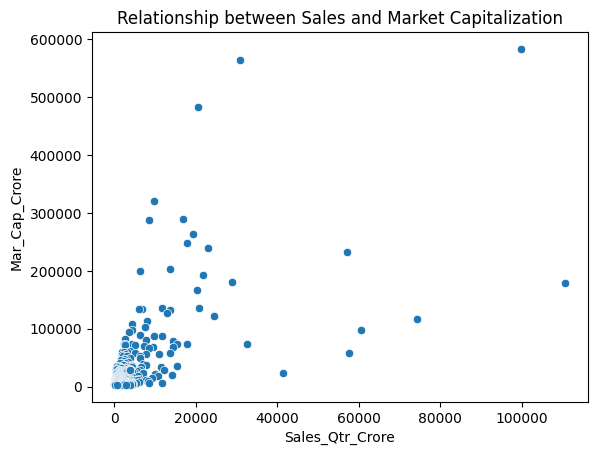

In [ ]:
# Data Visualization
sns.scatterplot(x='Sales_Qtr_Crore', y='Mar_Cap_Crore', data=Data)
plt.title('Relationship between Sales and Market Capitalization')
plt.show()


When examining a scatter plot between sales and market capitalization, market capitalization is more when sales are between 0-20000 crores!

Dense clusters of points in certain areas of the scatter plot, it indicates that many companies have similar sales and market capitalization values. This suggests a common trend or a typical relationship between sales and market capitalization among those companies.

In [ ]:
# Calculate average market capitalization and sales
average_market_cap = Data['Mar_Cap_Crore'].mean()
average_sales = Data['Sales_Qtr_Crore'].mean()

print(f'Average Market Capitalization: {average_market_cap}')
print(f'Average Quarterly Sales: {average_sales}')


Average Market Capitalization: 28043.85698770492
Average Quarterly Sales: 3815.970225409836


The average market capitalization of the top companies in the dataset is approximately ₹28,043.86 crores.

The average quarterly sales of the top companies in the dataset amount to approximately ₹3,815.97 crores.

The average market capitalization being significantly higher than the average quarterly sales suggests that these companies are valued quite substantially in the market.

While the average quarterly sales are considerably lower than the average market capitalization, it's important to note that sales figures can vary widely across different industries and company sizes. Companies with sales values higher than the average are likely performing well in their respective sectors, generating substantial revenue.

In [ ]:
# Calculate correlation coefficient
correlation = Data['Mar_Cap_Crore'].corr(Data['Sales_Qtr_Crore'])
print(f'Correlation Coefficient: {correlation}')


Correlation Coefficient: 0.6221932135482856


A correlation coefficient of 0.6 signifies a moderate positive relationship between sales and market capitalization. This means that, on average, as sales increase, market capitalization tends to increase as well. However, the relationship is not perfect, indicating that other factors also contribute to the variations observed in market capitalization.







In [ ]:
# Prepare the data for regression
X = Data['Sales_Qtr_Crore'].values.reshape(-1, 1)
y = Data['Mar_Cap_Crore'].values.reshape(-1, 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Calculate metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean Absolute Error: 25705.772908949864
Mean Squared Error: 3767705902.685809
Root Mean Squared Error: 61381.641414072736


1.Mean Absolute Error (MAE):

MAE represents the average absolute difference between the predicted and actual values.
An MAE of 25705.77 suggests that, on average, the model's predictions are off by approximately ₹25,705.77 crores when estimating market capitalization based on sales.
Lower MAE values indicate better accuracy, so a lower MAE would have been preferable. However, the interpretation of what constitutes a "good" MAE depends on the context of the data and the industry standards.

2.Mean Squared Error (MSE):

MSE represents the average of the squared differences between predicted and actual values.
MSE of 3767705902.69 indicates that, on average, the squared errors of the model predictions amount to approximately ₹3,767,705,902.69 crores.


3.Root Mean Squared Error (RMSE):

RMSE is the square root of MSE and provides an interpretable value in the same unit as the dependent variable (market capitalization in crores in this case).
An RMSE of 61381.64 crores means that, on average, the model's predictions deviate from the actual market capitalization by approximately ₹61,381.64 crores.




In [ ]:

# Find the company with the highest market capitalization
highest_market_cap_company = Data.loc[Data['Mar_Cap_Crore'].idxmax()]

# Find the company with the lowest market capitalization
lowest_market_cap_company = Data.loc[Data['Mar_Cap_Crore'].idxmin()]

# Print the results
print("Company with the Highest Market Capitalization:")
print(highest_market_cap_company)

print("\nCompany with the Lowest Market Capitalization:")
print(lowest_market_cap_company)


Company with the Highest Market Capitalization:
S.No.                           1
Name               Reliance Inds.
Mar_Cap_Crore           583436.72
Sales_Qtr_Crore           99810.0
Name: 0, dtype: object

Company with the Lowest Market Capitalization:
S.No.                          499
Name               Natl.Fertilizer
Mar_Cap_Crore              3017.07
Sales_Qtr_Crore            2840.75
Name: 486, dtype: object


1.Reliance Industries, with a market capitalization of ₹583,436.72 Crores, stands out as a market leader with a significantly higher valuation compared to National Fertilizer, which has a market capitalization of ₹3,017.07 Crores. This stark difference illustrates the substantial disparity in market capitalization among companies in the dataset.

2.Despite the vast difference in market capitalization, Reliance Industries and National Fertilizer have relatively comparable sales figures for the last quarter (₹99,810.00 Crores for Reliance Industries and ₹2,840.75 Crores for National Fertilizer).

In [ ]:
# Find the company with the highest quarterly sales
highest_sales_company = Data.loc[Data['Sales_Qtr_Crore'].idxmax()]

# Find the company with the lowest quarterly sales
lowest_sales_company = Data.loc[Data['Sales_Qtr_Crore'].idxmin()]

# Print the results
print("Company with the Highest Quarterly Sales:")
print(highest_sales_company)

print("\nCompany with the Lowest Quarterly Sales:")
print(lowest_sales_company)


Company with the Highest Quarterly Sales:
S.No.                     15
Name                 I O C L
Mar_Cap_Crore      178017.48
Sales_Qtr_Crore    110666.93
Name: 14, dtype: object

Company with the Lowest Quarterly Sales:
S.No.                           406
Name               Ujjivan Fin.Ser.
Mar_Cap_Crore               4293.42
Sales_Qtr_Crore                 0.0
Name: 393, dtype: object


1.IOC, a major player in the energy sector, reported substantial quarterly sales of ₹110,666.93 Crores. In contrast, Ujjivan Financial Services reported no sales for the quarter, indicating a unique situation that might require further investigation.

2.Despite Ujjivan Financial Services' low sales, its market capitalization is relatively higher compared to the absence of sales. This could be due to factors other than quarterly sales, such as profitability, growth prospects, or investor sentiment, influencing the company's market valuation.

In [ ]:
# Calculate average sales
average_sales = Data['Sales_Qtr_Crore'].mean()

# Print the average sales
print("Average Quarterly Sales: {:.2f} Crores".format(average_sales))


Average Quarterly Sales: 3815.97 Crores


The average quarterly sales across the dataset amount to approximately ₹3,815.97 Crores.

In summary, the average quarterly sales figure acts as a reference point for companies and investors, aiding in performance evaluation, strategic planning, and investment decisions. Companies can use this information to set realistic targets, optimize their operations, and adapt to market dynamics, ensuring sustainable growth and competitiveness.

In [ ]:
# Sort the DataFrame by market capitalization in descending order and select the top companies
top_companies = Data.sort_values(by='Mar_Cap_Crore', ascending=False).head(10)

# Print the top companies with the highest market capitalization
print("Top Companies with Highest Market Capitalization:")
print(top_companies[['Name', 'Mar_Cap_Crore']])


Top Companies with Highest Market Capitalization:
             Name  Mar_Cap_Crore
0  Reliance Inds.      583436.72
1             TCS      563709.84
2       HDFC Bank      482953.59
3             ITC      320985.27
4         H D F C      289497.37
5  Hind. Unilever      288265.26
6   Maruti Suzuki      263493.81
7         Infosys      248320.35
8         O N G C      239981.50
9  St Bk of India      232763.33


The identified top companies with the highest market capitalization represent the market leaders in the dataset. Here are the key insights derived from this information:

1.Dominance of Industry Giants: Companies like Reliance Industries, TCS, HDFC Bank, and ITC, among others, showcase a substantial market presence and dominance. These organizations often lead their respective industries and are pivotal players in the national and international markets.

2.Diverse Sectors: The top companies span various sectors, including telecommunications, banking, FMCG (Fast-Moving Consumer Goods), and technology. This diversification indicates the breadth and depth of the market, with significant players emerging in multiple sectors of the economy.

3.Investor Attractiveness: These companies are generally considered attractive investments for many investors due to their stability, profitability, and potential for long-term growth. Investors often look for market leaders when making investment decisions, as these companies tend to withstand market fluctuations better than their counterparts.

In summary, the presence of these top companies with high market capitalization values signifies not only their individual success but also their collective impact on the economy.

In [ ]:
# Define a threshold for exceptionally high sales (you can adjust this threshold based on your dataset)
threshold_sales = 50000  # For example, considering sales above 5000 Crores as exceptionally high

# Filter companies with exceptionally high sales
high_sales_companies = Data[Data['Sales_Qtr_Crore'] > threshold_sales]

# Print the companies with exceptionally high sales
print("Companies with Exceptionally High Sales (Above {} Crores):".format(threshold_sales))
print(high_sales_companies[['Name', 'Sales_Qtr_Crore']])


Companies with Exceptionally High Sales (Above 50000 Crores):
              Name  Sales_Qtr_Crore
0   Reliance Inds.         99810.00
9   St Bk of India         57014.08
14         I O C L        110666.93
23     Tata Motors         74156.07
27         B P C L         60616.36
54         H P C L         57474.25


The identified companies with exceptionally high sales, each exceeding 50,000 Crores in a single quarter, represent exceptional revenue performance within the dataset. Here are the key insights derived from this information:

Reliance Industries: Reliance Industries leads the pack with quarterly sales of 99,810.00 Crores, showcasing its dominance in the market. This remarkable sales figure solidifies Reliance Industries' position as a market leader with substantial revenue generation capabilities.

Financial Sector Powerhouses: State Bank of India (St Bk of India) also stands out with quarterly sales of 57,014.08 Crores, emphasizing its significant role in the financial sector. Financial institutions with such high sales often indicate substantial customer transactions and financial activities.

Energy Sector Giants: Indian Oil Corporation Limited (I O C L), Bharat Petroleum Corporation Limited (B P C L), and Hindustan Petroleum Corporation Limited (H P C L) are key players in the energy sector. Their quarterly sales figures of 110,666.93 Crores, 60,616.36 Crores, and 57,474.25 Crores respectively reflect the substantial revenue generated in this industry. These companies play pivotal roles in fuel supply, reflecting the nation's energy consumption.

Automobile Industry: Tata Motors, a leading automobile manufacturer, demonstrates robust sales with figures reaching 74,156.07 Crores. This figure underscores the demand for their vehicles and their extensive market presence.



Consumer Trends: These figures can also reflect consumer behaviors and preferences, providing insights into the products and services that are in high demand. Businesses often use such data to align their strategies with market needs.








Conclusion:
A comprehensive analysis of market capitalization and quarterly sales data provides valuable insights into the competitive landscape. By understanding these key metrics and meaningful relationships, companies can make informed decisions, refine their strategies, and stay competitive in the dynamic market environment.